# Convolution Neural Network

The Convolutional Neural Network gained popularity through its use with image data, and is currently the state of the art for detecting what an image is, or what is contained in the image.

### Convolution

The primary purpose for a convolutional layer is to detect features such as edges, lines, blobs of color, and other visual elements. The filters can detect these features. The more filters that we give to a convolutional layer, the more features it can detect.

##### Filter

A filter is a square-shaped object that scans over the image. A grid can represent the individual pixels of a grid. You can think of the convolutional layer as a smaller grid that sweeps left to right over each row of the image. 

![Machine Learning](resources/images/M_2/conv1.gif)

![Machine Learning](resources/images/M_2/conv2.gif)

##### Padding

![Machine Learning](resources/images/M_2/conv3.gif)

![Machine Learning](resources/images/M_2/conv4.gif)


##### Pooling

![Machine Learning](resources/images/M_2/pooling.jpg)


![Machine Learning](resources/images/M_2/conv5.webp)

### CIFAR-10 DATASET

![MNIST](resources/images/M_2/cifar10.png)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

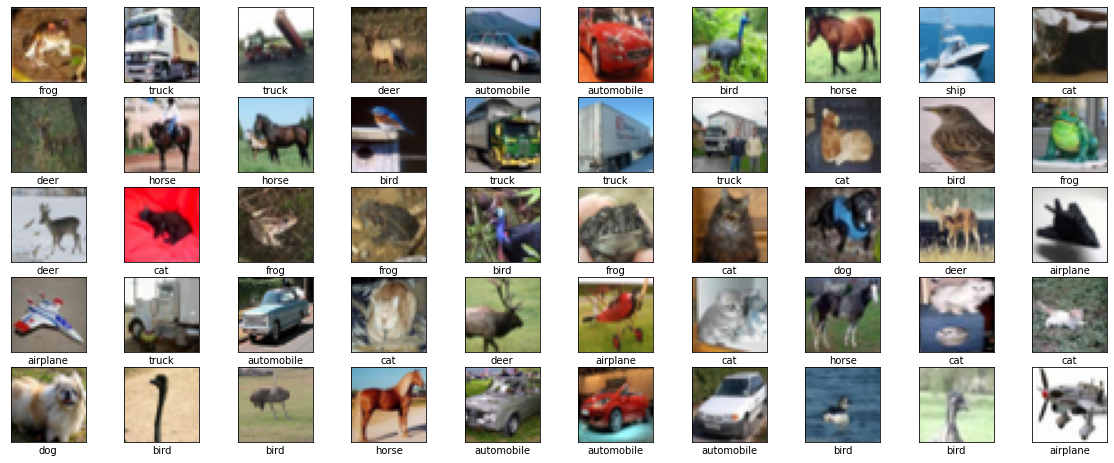

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 10s 7ms/step - loss: 1.8407 - accuracy: 0.3137 - val_loss: 1.3912 - val_accuracy: 0.4966
Epoch 2/5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3618 - accuracy: 0.5051 - val_loss: 1.3136 - val_accuracy: 0.5309
Epoch 3/5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1917 - accuracy: 0.5718 - val_loss: 1.1378 - val_accuracy: 0.5939
Epoch 4/5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0670 - accuracy: 0.6184 - val_loss: 1.0746 - val_accuracy: 0.6270
Epoch 5/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9925 - accuracy: 0.6509 - val_loss: 1.0693 - val_accuracy: 0.6314


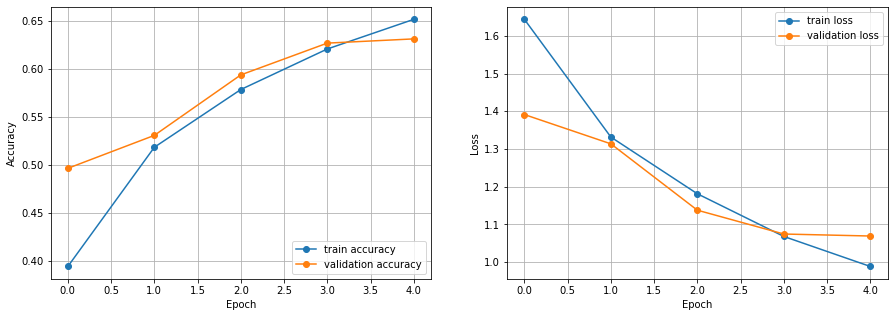

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.0872 - accuracy: 0.6233

Test Accuracy: 0.6233000159263611

Test Loss: 1.0872271060943604


In [11]:
predictions = model.predict(X_test)

In [12]:
predictions[0]

array([0.03573252, 0.00270385, 0.02380665, 0.7501017 , 0.02658169,
       0.10652085, 0.01328281, 0.0137018 , 0.0246725 , 0.00289556],
      dtype=float32)

In [15]:
np.argmax(predictions[0])

3

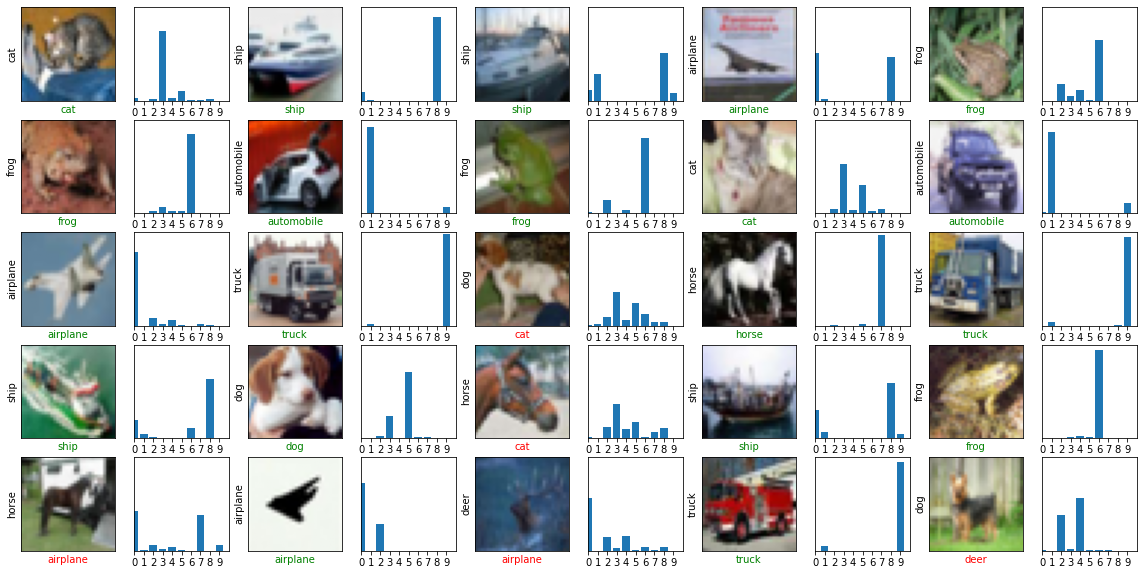

In [38]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()
